# Assignment 2 - Differential Equations

Solving partial differential equations is crucial to a huge variety of physical problems encountered in science and engineering. There are many different numerical techniques available, all with their own advantages and disadvantages, and often specific problems are best solved with very specific algorithms.

You will have learnt about Euler and Runge-Kutta methods in 2nd year lectures, and you should have explored the class of problem that can be solved with numerical integration in exercises.  In this assignment, we will cover more complex classes of problem - described below.


## Initial value problems

In this class of problem, the state of a system is fully described by an ordinary differential equation together with an initial condition.  For example, the motion of a body under gravity, with initial conditions given by the position and momentum of the body at a particular point in time.  The soluiton (ie. position and momentum at an arbitrary time in the future) can then be found by integration.  You should have encountered the use of numerical integration in solving such problems in the 2nd year course.

## Boundary value problems

Boundary value problems differ in that the conditions are specified on a set of boundaries, rather than at just one extreme.  For example, the electric field between a pair of capacitor plates at fixed potential, as discussed in the problem below.

There are several numerical approaches for solving boundary value problems, for example :

### Shooting Method

In this method, the boundary value problem is reduced to an initial value problem, which is solved numerically for different parameter choices. A solution is found when a set of parameters give the desired boundary conditions.  For example, finding a rocket trajectory which joins two specified points in space.  The boundary conditions are the specified points, and the initial momentum is a parameter that may be varied until a solution is found.  (This should sound familiar!)

### Finite Difference Methods

In this class of method, the differential equation is evaluated at discrete points in space and time, and derivatives are approximated by finite differences.  The Euler and Runga-Kutta methods are simple examples.  These methods typically involve iteration on the set of finite values until a solution is found.

### Relaxation

This is a common technique used to solve time-independent boundary condition problems.  An initial guess at the solution is supplied, and then allow to "relax" by iterating towards the final solution.  Conceptually this is is the same as the time-dependent problem of letting the system reach equilibrium from some arbitrary initial state.

The steps for implementing a relaxation method are :
1. Define a (normally regular) spatial grid covering the region of interest including points (or “nodes”) on the boundaries
2. Impose the boundary conditions by fixing the nodes on the boundaries to the relevant values
3. Set all non-boundary nodes to an initial guess
4. Write down finite difference equations
5. Pick a convergence criterion
6. Iterate the equations at each node until the solution converges

Care must be taken to choose the form of the equations and iteration method to ensure stability and efficiency.

## Q1 - The Poisson Equation

Consider the example of the Poisson equation $(\nabla^2V = −\rho)$ in one dimension. The grid of nodes in this case can be taken as a series of $n$ equally spaced points $x_i$ with a spacing $\Delta x = h$. The Taylor expansion of $V$ around the point $x_i$ is :

$$ V(x) = V(x_i) + \delta x \frac{dV(x_i)}{dx} + \delta x^2 \frac{d^2V(x_i)}{dx^2} + ...$$

so adding the values at $\delta x = \pm h$ (i.e. at $x_n \pm 1$) gives :

$$ V(x_{i−1}) + V(x_{i+1}) = 2V(x_i) + h^2 \frac{d^2V(x_i)}{dx^2} $$

which can be rearranged to give Equation 1 :

$$ \frac{d^2V(x_i)}{dx^2} = \frac{V(x-{i−1}) + V(x_{i+1}) − 2V(x_i)}{h^2}  $$

This is the standard finite difference representation for the second derivative.

Generalising this equation to 2D in the Poisson equation, and rearranging, gives Equation 2, that can be used to iterate the value at each node:

$$ V(x_i,y_j)= \frac{1}{4} (V(x_{i−1},y_j)+V(x_{i+1},y_j)+V(x_i,y_{j−1})+V(x_i,y_{j+1}))+ \frac{\rho(x_i,y_j)h^2}{4} $$

In the absence of any sources ($\nabla^2 V=0$, i.e. the Laplace equation) each node is simply the average of its four closest neighbours.

This equation can be solved in a number of ways. One option is to calculate a new value for each node based on the previous values for each of the neighbour nodes, requiring two complete copies of the grid. This is called the Jacobi method. A second option is to update the values on the grid continually, so each node is updated using partially old and partially new values. This is the Gauss-Seidel method.

## 1a) 
Write a function to solve Laplace’s equation in two dimensions for the potential V. You should use the finite-difference representation above (with $\rho=0$) and iterate using either the Jacobi or Gauss-Seidel method. You will need to choose and apply a convergence condition e.g. no node value changes by more than X% between successive iterations.

The precision target (convergence condition) is  1e-10
The grid is divided into  2601  increments
The initial guess for the potential is  100
The time taken to process the jacobi graph was  4.38690185546875e-05  seconds
The iteration loop was run  10715  times to reach a precision of  1e-10  with a grid divided into 2601  sections


<Figure size 1100x700 with 0 Axes>

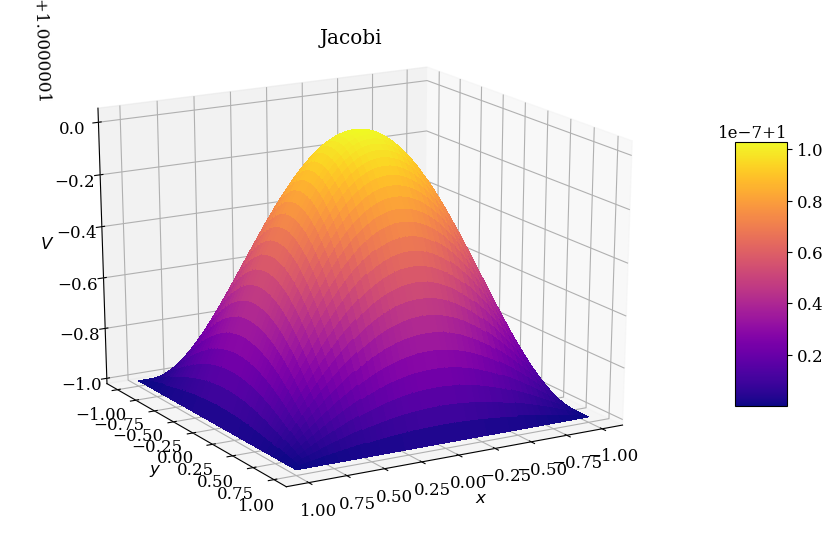

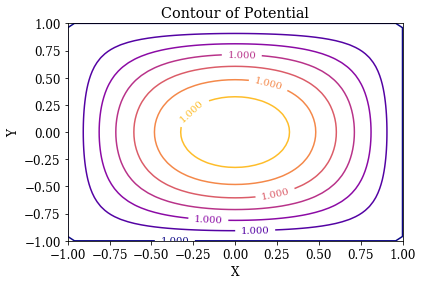

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(11,7), dpi=100)

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.plasma,
            linewidth=0, antialiased=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(20,60) #sets the rotation of the image

    
def printlincontour(x,y,V): #similar to plot_3D but instead plots in 2D and with contours
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, V,cmap=cm.plasma)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour of Potential')
    plt.show()
   

def iterationloop(V, precision_target): #precision target = the convergence condition
    count = 0 #to determine how many times the loop is run to reach the convergence condition
    precision = 1
    Vn = np.empty_like(V)#copies the V meshgrid and pastes it into a new variable
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])   #this is the jacobi equation
        precision = L2_norm_error(V, Vn) #redefines the precision until it reaches the target
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    return V, count

def L2_norm_error(V, Vn): #eucledian norm of the iterations
    return np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))



#setting the variables
nx =51 #determines the number of increments that the grid is divided into. changes the resolution of the graph.
ny = nx# for symmetry
x = np.linspace(-1,1,nx)  #sets up the axes fot the meshgrid
y = np.linspace(-1,1,ny)
Vguess = 100 #the initial guess for the potential
precision_target = 0.0000000001 #gives the convergence condition

print('The precision target (convergence condition) is ', precision_target)
print('The grid is divided into ', nx*ny, ' increments')
print('The initial guess for the potential is ', Vguess)

#__________________________________________________________
# printing the JACOBI solution graph

V = np.zeros((nx,ny))

tbefore = time.time()
 #this needs to be done so the V gets looped
tafter = time.time()
V.fill(Vguess) #inputs the initial guess into the meshgrid
print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')

#these are the boundary conditions
V[-1,:] =1
V[0,:] =1
V[:, -1]=1
V[:, 0]=1
V = iterationloop(V,precision_target)[0]

plot_3D(x, y, V, 'Jacobi')
printlincontour(x,y,V)

    

When first developing the code, the while loop inside iterationloop(V, precision_target) also contained two for loops which changed each increment of the potential in the meshgrid. However, this was highly inefficient and was replaced by a single while loop. This is because the computational complexity was decreased from O(n)^3 to O(n)

The while loop first ran on a set number of iterations, but was then changed to accommodate the convergence condition as given by the L2 norm error.

The number of grid separations were kept the same for x and y to provide symmetry.

Initially, a potential guess of 30 was used. This does not matter as with a low enough convergence condition, all initial guesses will result in the same graph.



Verify your function by checking it works in a simple, known case. Compare the solution found with the analytical solution and quantify the differences. Use this to investigate the sensitivity of your solution to the choice of grid density and convergence condition.

The known example being tested is for V = x+y
The precision target (convergence condition) is  1e-10
the grid is divided into  3600  increments
The time taken to process the analytical graph was  0.0002639293670654297  seconds
The iteration loop was run  11395  times to reach a precision of  1e-10  with a grid divided into 3600  sections
The time taken to process the jacobi graph was  0.6244840621948242  seconds


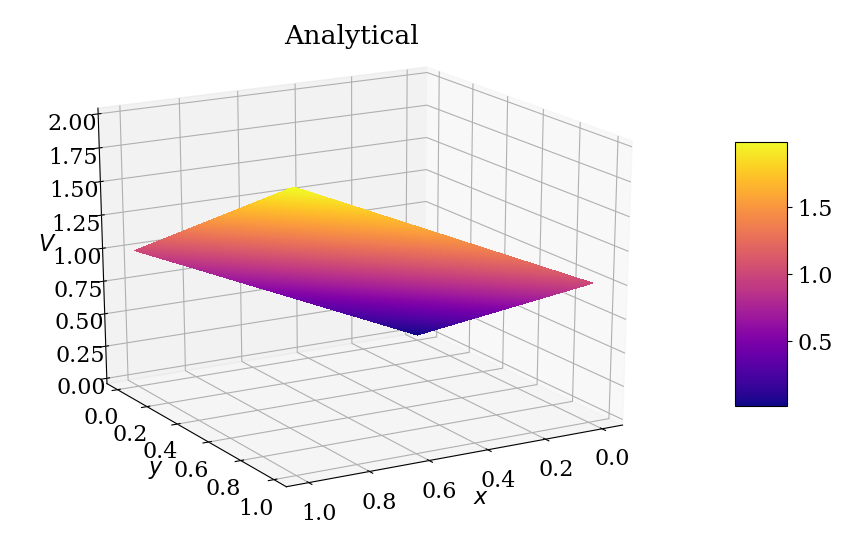

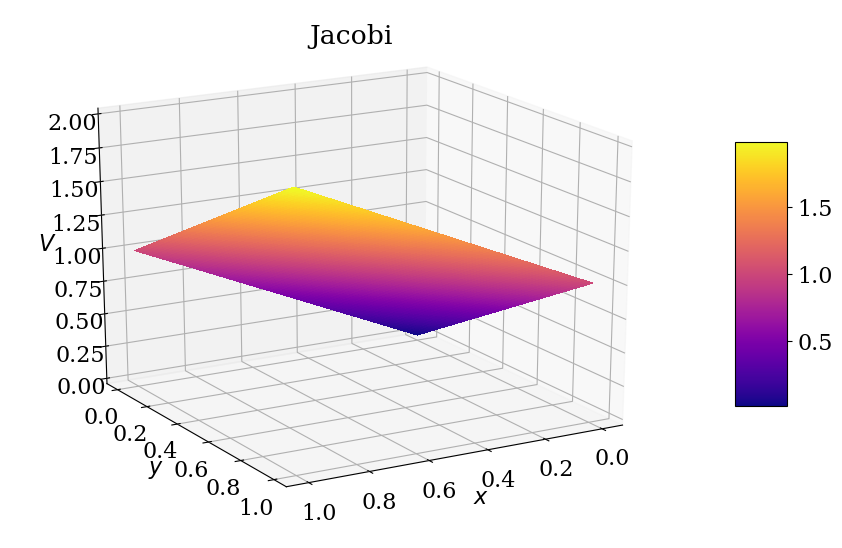

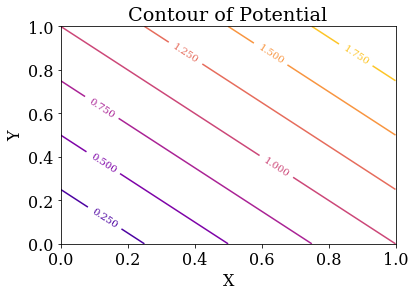

The iteration loop was run  3  times to reach a precision of  0.1  with a grid divided into 3600  sections
The iteration loop was run  35  times to reach a precision of  0.010000000000000002  with a grid divided into 3600  sections
The iteration loop was run  362  times to reach a precision of  0.0010000000000000002  with a grid divided into 3600  sections
The iteration loop was run  1690  times to reach a precision of  0.00010000000000000003  with a grid divided into 3600  sections
The iteration loop was run  3282  times to reach a precision of  1.0000000000000004e-05  with a grid divided into 3600  sections
The iteration loop was run  4902  times to reach a precision of  1.0000000000000004e-06  with a grid divided into 3600  sections
The iteration loop was run  6525  times to reach a precision of  1.0000000000000005e-07  with a grid divided into 3600  sections
The iteration loop was run  8148  times to reach a precision of  1.0000000000000005e-08  with a grid divided into 3600  secti

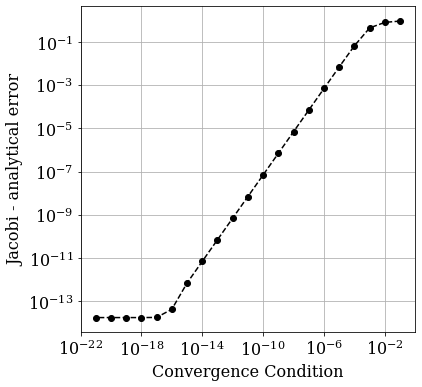

The iteration loop was run  49  times to reach a precision of  1e-08  with a grid divided into 25  sections
The iteration loop was run  246  times to reach a precision of  1e-08  with a grid divided into 100  sections
The iteration loop was run  567  times to reach a precision of  1e-08  with a grid divided into 225  sections
The iteration loop was run  1005  times to reach a precision of  1e-08  with a grid divided into 400  sections
The iteration loop was run  1552  times to reach a precision of  1e-08  with a grid divided into 625  sections
The iteration loop was run  2205  times to reach a precision of  1e-08  with a grid divided into 900  sections
The iteration loop was run  2959  times to reach a precision of  1e-08  with a grid divided into 1225  sections
The iteration loop was run  3811  times to reach a precision of  1e-08  with a grid divided into 1600  sections
The iteration loop was run  4758  times to reach a precision of  1e-08  with a grid divided into 2025  sections
The

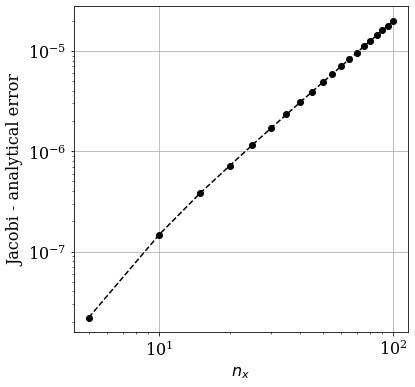

In [20]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


def V_analytical(x,y): #the equation of the analytical 
    X,Y= np.meshgrid(x,y)
    V_an = X+Y

    return V_an

#the intended precision is given by precision_target
#making a function to create different initial guesses with different grid densities.
#the boundary conditions must be inputted as the same as the original.
def iterationloop_IG(nx): 
    V = np.zeros((nx,nx)) #to create a square grid
    x = np.linspace(0,1,nx)
    y = x #because it is a square grid
    
    V[0,:] = x #top
    V[nx-1,:] = np.linspace(1,2,nx)  #bottom
    V[:,0] =  y#right
    V[:,nx-1] =  np.linspace(1,2,nx) #left  
        
    return V, x, y

def errorgraphs(a,b,xtitle):
    plt.figure(figsize=(6,6))
    plt.grid(True)
    plt.xlabel(xtitle)
    plt.ylabel(r'Jacobi - analytical error')
    plt.loglog(a, b, color='k', ls='--', marker='o')
    plt.show()

    
    
nx =60
ny = nx

x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)

precision_target = 0.0000000001

print('The known example being tested is for V = x+y')
print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')

#__________________________________________________________
# printing the ANALYTICAL solution graph

tbefore = time.time()# to output the processing time
V_an = V_analytical(x,y)
tafter = time.time()

title = 'Analytical'
plot_3D(x, y, V_an, title)
print('The time taken to process the analytical graph was ',tafter-tbefore,  ' seconds')

#__________________________________________________________
# printing the JACOBI solution graph

V = np.zeros((nx,ny))
#the boundary conditions. (0,0) is at the top, right.

V[0,:] = x #top
V[nx-1,:] = np.linspace(1,2,nx)  #bottom
V[:,0] =  y#right
V[:,nx-1] =  np.linspace(1,2,nx) #left

tbefore = time.time()# to output the processing time
V = iterationloop(V,precision_target)[0] #this needs to be done so the V gets looped
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')

plot_3D(x, y, V, 'Jacobi')
printlincontour(x,y,V)


#_______________________________________________________________________________________________
#this part compares different convergence conditions to the error between the analytical and jacobi.

p = 0.1 #initial convergence condition value
prec_values = []
nx = 60
i = 0
datapoints = 20 #amount of datapoints to be plotted
while i <=datapoints: #to generate multiple convergence condition values
    prec_values.append(p)
    p = p*0.1
    i+=1

error = np.empty_like(prec_values, dtype =  np.float) #creates an array with same dimensions as nx_values
for i, precision_target in enumerate(prec_values): #redefenition loop for V, V_an and the errors between them
    V,x,y = iterationloop_IG(nx)
    V = iterationloop(V.copy(), precision_target)[0]
    V_an = V_analytical(x,y)
    error[i] = L2_norm_error(V, V_an)
    
errorgraphs(prec_values,error,'Convergence Condition')

#_______________________________________________________________________________________________
# the next part resets certain parameters to create the error graph.
#this part compares different grid densities to the error.
n = 5
nx_values = []
precision_target = 1e-8

nmax = 100 #must be multiples of n
while n<= nmax: #to generate different nx values
    nx_values.append(n)
    n += 5

error = np.empty_like(nx_values, dtype =  np.float) 
for i, nx in enumerate(nx_values): #redefenition loop for V, V_an and the errors between them
    V,x,y = iterationloop_IG(nx)
    V = iterationloop(V.copy(), precision_target)[0]
    V_an = V_analytical(x,y)
    error[i] = L2_norm_error(V, V_an)
 
errorgraphs(nx_values,error,r'$n_x$')




The simple known condition was for V = x + y. This meant that the boundary conditions had to be changed to accommodate the gradient. The (0,0) point  of the potential was at the 'top', 'right' of the meshgrid.

As expected, the error between the two methods increases with a larger convergence condition. This trend starts showing at around 10^-17. If the convergence condition is bigger, then the while loop will not repeat as many times and the difference will be larger.

It was initially expected for the error to decrease with an increase in grid density. This was the case when testing a periodic sinh function with matching boudary conditions (extension 1). However, in the case of the arithmetic x+y, the increased grid density allows for more overall error, as each grid element contributes an additional error.

Furthermore, a higher grid density means that there is a higher resolution and the differences between the methods can be better distinguished. In contrast, a lower grid density means that the graphs are more approximated, meaning that the difference between them is less prominent.

## 1b)
Now use your function to calculate the potential and electric field within and around a parallel plate capacitor comprising a pair of plates of length a, separation d. Demonstrate that the field configuration approaches the “infinite” plate solution (E = V/d between plates, E = 0 elsewhere) as the ratio of  becomes large.

The precision target (convergence condition) is  1e-10
the grid is divided into  400  increments
The iteration loop was run  354  times to reach a precision of  1e-10  with a grid divided into 400  sections
The time taken to process the jacobi graph was  0.01596975326538086  seconds


/Users/ardjuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


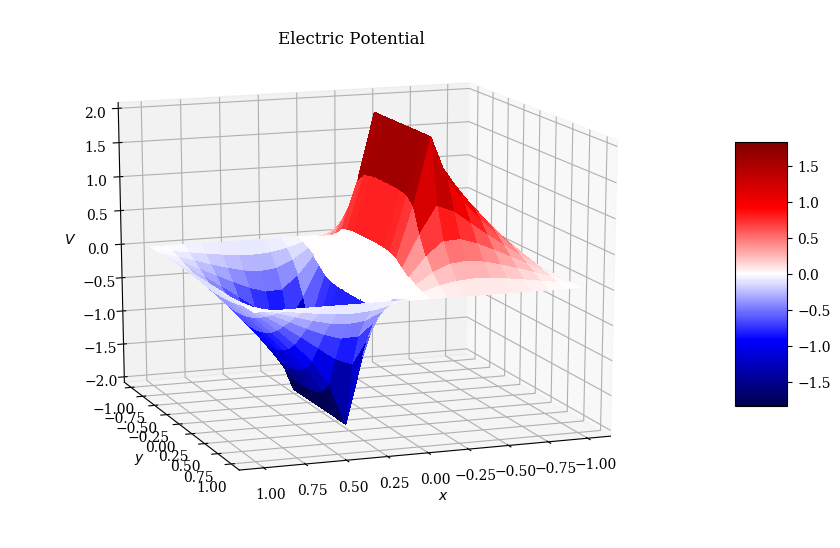

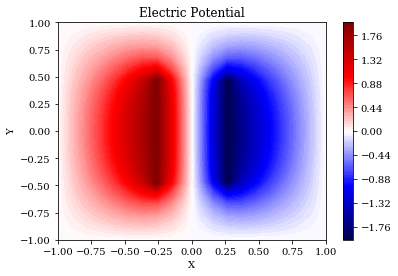

The iteration loop was run  1  times to reach a precision of  1e-10  with a grid divided into 400  sections


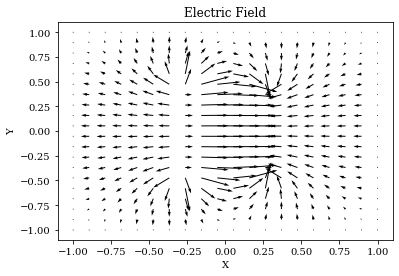

In [102]:
%matplotlib inline

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.seismic,
            linewidth=0, antialiased=False)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(15,70) #sets the rotation of the image
    plt.show()
    
def printgraph(x, y, V):
    colorinterpolation = 100
    colourMap =  plt.cm.seismic 
    X,Y = np.meshgrid(x,y)
    plt.title("Electric Potential")
    plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
def quiverplot(x,y,EFx, EFy):
        
    X,Y = np.meshgrid(x,y)
    plt.quiver(X,Y,EFx, EFy, scale = 100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.show()


#the intended precision is given by precision_target
def iterationloop(V, precision_target):
    count = 0
    precision = 1
    Vn = np.empty_like(V)
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])  
        V[5:15, 7:8] = 2 #determines the length and thickness of each capacitor plate.
        V[5:15, 12:13] = -2
        precision = L2_norm_error(V, Vn)
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    return V, count


    
nx =20
ny = nx
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
precision_target = 0.0000000001
print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')
V = np.zeros((nx,ny))
tbefore = time.time()
V = iterationloop(V,precision_target)[0] 
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')
plot_3D(x, y, V, 'Electric Potential')
printgraph(x, y, V)


# below is the code to plot the electric field
dx = 0.1
V0 = np.zeros((nx,nx))
V_cap = iterationloop(V, precision_target)[0]
EFx = np.array(V0)
EFy = np.array(V0)
for i in range(1,len(V0)-1):# a loop to differentiate the potential.
    for j in range(1,len(V0)-1):
        EFx[1:-1,1:-1] = -(V_cap[1:-1,2:]- V_cap[1:-1,:-2])/(2*dx)
        EFy[1:-1,1:-1] = -(V_cap[2:,1:-1]- V_cap[:-2,1:-1])/(2*dx)

quiverplot(x,y,EFx, EFy)


The original plan was to create three dimensional capacitor plates, but proved to be a lot more complex than expected. Instead, the capacitor is seen from above.

Each plate is a line of inputted potential, with values 1 and -1. They are one grid element thick.

The separation can be worked out from the number of grid elements between them and the grid density.

to increase the ratio of V/d, d was decreased. As demonstrated, the potential between the two plates becomes zero at this condition, where the electric field is at its strongest.

As the arrows on the quiver plot are negligible compared to the arrows between the plates, we can assume negligibility.


# Q2 - The Diffusion Equation

Solving the diffusion equation 

$$\alpha \nabla^2 \phi = \frac{\partial \phi}{\partial t}$$

is mathematically similar to solving the Poisson equation. The technique will be to start from known initial conditions and use finite difference equations to propagate the node values forwards in time (subject to any boundary conditions).

A first try using Equation 1 above gives the finite difference form:

$$\frac{\phi′(x_i) − \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi (x_{i−1}) + \phi(x_{i+1}) − 2\phi(x_i)]$$

Here the values, $\phi$, at three neighbouring points at a time t are used to evaluate the value $\phi`$ at the next time step, $t + \delta t$. This is known as a forward-time or explicit method. Unfortunately, this methood is known to be unstable for certain choices of $h$ and $\delta t$.

A stable alternative is obtained by using the equivalent backward-time or implicit equation:

$$\frac{\phi'(x_i) - \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi'(x_{i-1}) + \phi'(x_{i+1}) -  2\phi'(x_i)] $$

Now the spatial derivative on the right-hand side needs to be evaluated at $t + \delta t$, which may appear problematic as the $\phi(x)$ values are known while the updated $\phi′(x)$ values are not. Fortunately Equation 3 can be written explicitly in matrix form and solved using the methods explored in Assignment 1.


## 2a)
An iron poker of length 50 cm is initially at a temperature of 20 C. At time t = 0, one end is thrust into a furnace at 1000 C and the other end is held in an ice bath at 0 C. Ignoring heat losses along the length of the poker, calculate the temperature distribution along it as a function of time. You may take the thermal conductivity of iron to be a constant 59 W/m/K, its specific heat as 450 J/kg/K and its density as 7,900 kg/m3.

Your solution should apply the implicit finite difference method above. It is also recommended that you use an appropriate linear algebra routine from numpy/scipy. You should find ways to verify your results, and quantify the uncertainties due to the method. Discuss your results in the text box below.

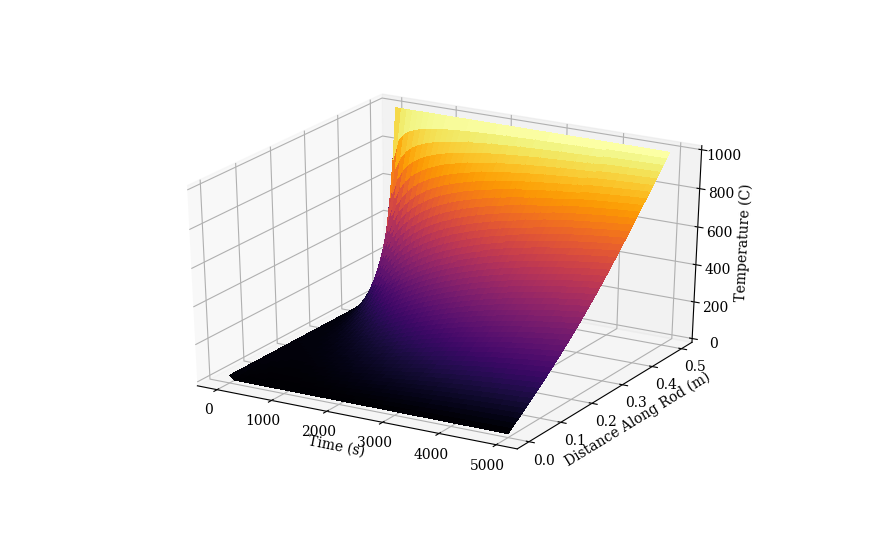

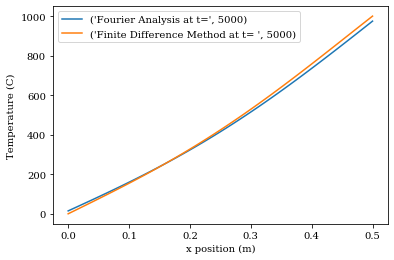

set tFou = tF to compare graphs at the same time stamp. Otherwise, both can be changed at will.


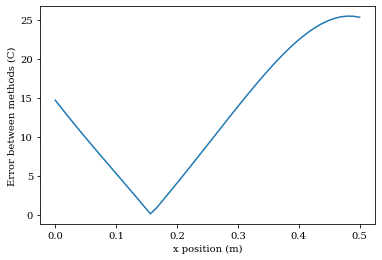

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import sparse
from matplotlib import cm
import sympy as sp
from scipy.integrate import quad
plt.rcParams.update({'font.size': 10})
#-------------------------------------------------------------------------------

nx = 49 #number of elements in the x direction
nt = 49 #number of elements in the t direction

Temp0 = 20 #initial temperature of entire rod
L = 0.5 #50 cm, length of rod
#spacial step
h = L/nx
#time step
tF = 5000 #final value of time


dt = tF/nt #time increment
alpha = 0.00001 #diffusion coefficiet. = coductivity / (density * specific heat capacity)
mult = dt*alpha/h**2 #the multiplier in the expanded solution
s = dt*alpha

x = np.linspace(0,L,nx) #defines the x ad t axes
t = np.linspace(0,tF,nt)

#different components of the rearranged solution to finite difference method
main_diag = (1 + 2*mult - s)*np.ones((1,nx-2))
off_diag = -mult*np.ones((1, nx-3))
diagonals = [main_diag, off_diag, off_diag]

a = main_diag.shape[1] #provides the dimensions for the Temperature grid
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray() #converts into matrix of arrays


Temp = np.zeros((nx,nt)) #creates the temperature matrix


 #the boundary condition. so one end is 0 and the other is 1000C or 1273.15K
Temp[0,:]= 0
Temp[-1,:] = 1000 
Temp[:,0]=20 #the conditions before t =0


for k in range(1, nt):
    c = np.zeros((nx-4,1)).ravel()
    b1 = np.asarray([mult*Temp[0,k], mult*Temp[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(Temp[1:nx-1, k-1])
    b = b1 + b2  # Right hand side matrix
    Temp[1:nx-1, k] = np.linalg.solve(A,b)  # Solve x=A\b
X,T = np.meshgrid(t,x)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, T, Temp, linewidth=0,cmap=cm.inferno, antialiased=False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance Along Rod (m)')
ax.set_zlabel('Temperature (C)')
ax.dist = 13
plt.show()

#_____________________________________________________________________________________________________

#the solution is be compared to the fourier series representation of temperature with distance
#the temperature calculated using the fourier series for a specific time

tFou = 5000 #the Temperature against distance is plotted at this time stamp.
V_vals = []

for i in np.arange(0.01,L,0.01): #i represents each x value as the loop moves towards L
    Fourier_sum = 0 #the sum term of the fourier series
    for n in range(1,100):
        Bn = lambda x: 4*(20-2000*x)*np.sin(2*n*np.pi*x) #fourier coefficient equation
        I, err = integrate.quad(Bn,0,0.5)
        V = I*np.sin(2*n*np.pi*i)*np.exp(-1*alpha*tFou*(2*n*np.pi)**2)
        Fourier_sum +=V
    V_vals.append(Fourier_sum+(1000*i/0.5))


plt.plot(x ,V_vals, label = ('Fourier Analysis at t=', tFou))
plt.plot(x, Temp[:,-1],label = ('Finite Difference Method at t= ', tF))
plt.xlabel('x position (m)')
plt.ylabel('Temperature (C)')

plt.legend()
plt.show()

print('set tFou = tF to compare graphs at the same time stamp. Otherwise, both can be changed at will.')
#to plot the error graph:
error = abs(V_vals-Temp[:,-1])
plt.plot(x,error)
plt.xlabel('x position (m)')
plt.ylabel('Error between methods (C)')
plt.show()





    

Initially I planned to create 2D graphs of position against temperature and use a loop to animate how it changes over time. However, The processing time was too long.

The boundary conditions were defined by the ice bath and furnace. The temperature was 0 at x =0  and 1000 at x = 0.5 for all times.

After about 8000 seconds with the provided diffusion coefficient, the rod obtains a constant temperature gradient. This is reached much faster with a larger diffusion coefficient.

For simplicity, a 2D graph of the distance against temperature can only be plotted for the set of data with the highest t value. for example, when trying to compare the fourier solution with the FDM at t = 5000, the time axis on the 3D graph will stop at 5000.

At higher time values, the fourier analysis and finite difference methods diverge at small x values.

For large values of h, the image loses definition and gains lots of errors. furthermore, h can not be zero because division by zero in the mult equation produces a math error.

## 2b)
Now repeat the calculation, but assume the far end of the poker from the furnace is no longer held at 0 C, and experiences no heat loss. You will need to modify your code to achieve this, and you should discuss the motivation for your changes below.

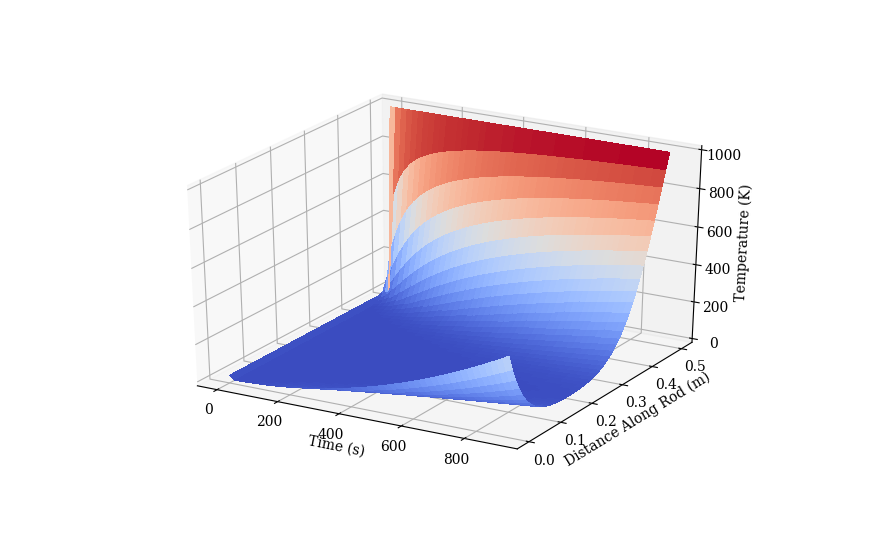

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import sparse
from matplotlib import cm
import sympy as sp
from scipy.integrate import quad
#using grids again
plt.rcParams.update({'font.size': 10})
#each of the ends of the grid are the ends of the rod
#so left side of meshgrid is the zero degrees. the example has left = 40



#-------------------------------------------------------------------------------


nx = 49 #number of elements in the x direction
nt = 49 #number of elements in the t direction

Temp0 = 20 #initial temperature of entire rod
L = 0.5 #50 cm, length of rod

#spacial step

#time step
tF = 900 #final value of time


dt = tF/nt #time increment
alpha = 0.00001 #diffusion coefficiet. = coductivity / (density * specific heat capacity)
s = dt*alpha

x = np.linspace(0,L,nx) #defines the x ad t axes
t = np.linspace(0,tF,nt)

h = x[1]- x[0]

#mult = dt*alpha/h**2 #the multiplier in the expanded solution
mult = 1

#different components of the rearranged solution to finite difference method
Temp = np.zeros((nx,nt)) #creates the temperature matrix



main_diag = (1 + 2*mult - s)*np.ones((1,nx-2))
off_diag = -mult*np.ones((1, nx-3))
diagonals = [main_diag, off_diag, off_diag]
a = main_diag.shape[1] #provides the dimensions for the Temperature grid
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray() #converts into matrix of arrays
#temperature of the iron poker before it was put in the furnace (before t = 0)
a = np.linspace(0,tF,nt)
 #the initial condition. so one end is 0 and the other is 1000C or 1273.15K

Temp[0,:]=0.0005*a**2
Temp[-1,:] = 1000 

for k in range(0, nt):
    
    c = np.zeros((nx-4,1)).ravel()
    
    b1 = np.asarray([mult*Temp[0,k], mult*Temp[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(Temp[1:nx-1, k-1])
    b = b1 + b2  # Right hand side matrix
    Temp[:,0]=20
    Temp[-1,:] = 1000 
    Temp[1:nx-1, k] = np.linalg.solve(A,b)  # Solve x=A\b
    
    
 #the conditions before t =0
    
X,T = np.meshgrid(t,x)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, T, Temp, linewidth=0,cmap=cm.coolwarm, antialiased=False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance Along Rod (m)')
ax.set_zlabel('Temperature (K)')
ax.dist = 13
plt.show()




    

The multiplier dt*alpha/h**2 had to be set to one for the code to work.

As one end is not placed inside the ice, the temperature gradient will become uniform over time. This was done by erasing the boudary condition of zero along the time axis. what is shown here is the beginning of that process.The temperature is expected to become even at higher time values.

## Extensions

There are many possible extensions to this assignment, for example :
* Model the field in more complex arrangements than the parallel plate capacitor in 1b).
* Model a point charge using the code from Q1? What are the problems/challenges in doing so ?
* Demonstrate that the explicit method in Q2 is unstable for some choices of $\delta t$ and $h$.
* Implement higher-order methods (eg. Crank-Nicolson which includes a 2nd order difference for the spaital derivative).

You are advised to discuss any extensions with your demonstrator or the unit director.  If you wish to include any extensions, please do so *below* this cell.

The precision target (convergence condition) is  1e-10
the grid is divided into  2601  increments


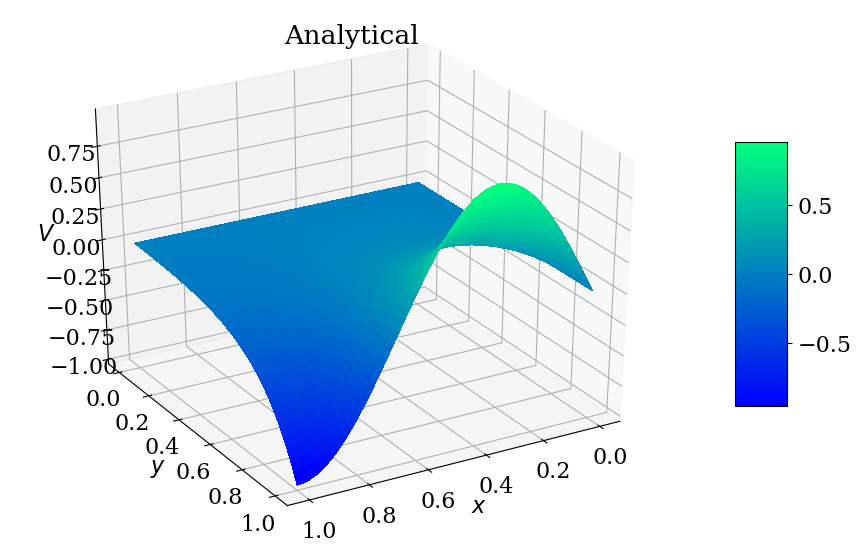

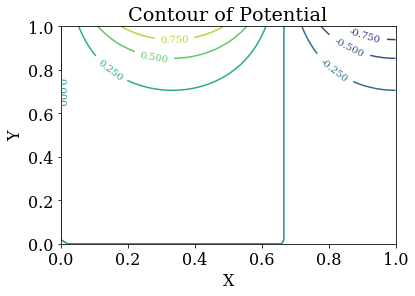

The time taken to process the analytical graph was  0.0003528594970703125  seconds
The iteration loop was run  7989  times to reach a precision of  1e-10  with a grid divided into 2601  sections
The time taken to process the jacobi graph was  0.45775604248046875  seconds


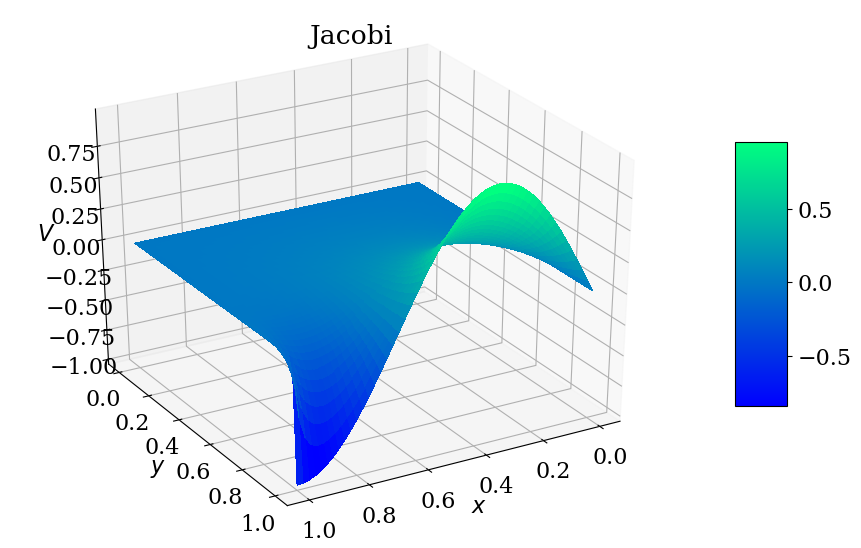

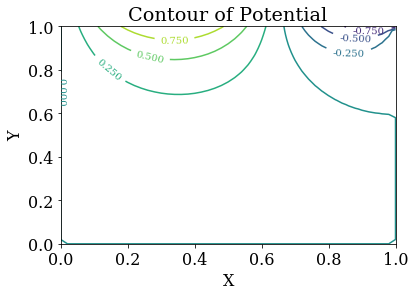

[5, 10, 15, 20, 25, 30]
[-0.06824331 -0.01976701 -0.03412165 -0.08365497 -0.9591853  -1.03688574]
The iteration loop was run  47  times to reach a precision of  1e-08  with a grid divided into 25  sections
The iteration loop was run  232  times to reach a precision of  1e-08  with a grid divided into 100  sections
The iteration loop was run  536  times to reach a precision of  1e-08  with a grid divided into 225  sections
The iteration loop was run  949  times to reach a precision of  1e-08  with a grid divided into 400  sections
The iteration loop was run  1465  times to reach a precision of  1e-08  with a grid divided into 625  sections
The iteration loop was run  2080  times to reach a precision of  1e-08  with a grid divided into 900  sections
[0.21930435 0.31956683 0.34363787 0.35149652 0.354488   0.35566888]


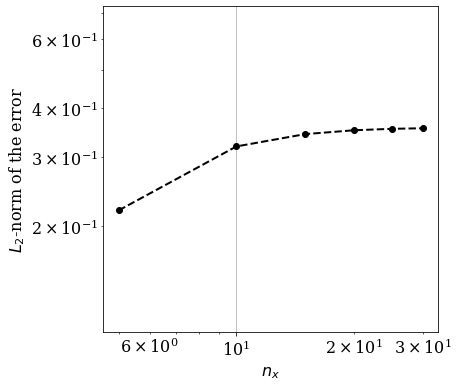

In [114]:
#extension 1: jacobi vs analytical with different boundary conditions (adaptation from 1a)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.winter,
            linewidth=0, antialiased=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(30,60) #sets the rotation of the image
    
def printlincontour(x,y,V):
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, V)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour of Potential')
    plt.show()
    
def V_analytical(x,y):
    X,Y= np.meshgrid(x,y)
    V_an = np.sinh(1.5*np.pi*Y / x[-1]) /\
    (np.sinh(1.5*np.pi*y[-1]/x[-1]))*np.sin(1.5*np.pi*X/x[-1])

    return V_an

#the intended precision is given by precision_target
def iterationloop(V, precision_target):
    count = 0
    precision = 1
    Vn = np.empty_like(V)#copies the V meshgrid and pastes it into a new variable
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])   #this is the jacobi equation
        precision = L2_norm_error(V, Vn)
         
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    
    return V, count
def L2_norm_error(V, Vn):
    
    return np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))

def processtimegraph(precisions,processtimes):
    plt.plot(precisions, (processtimes), marker='o')
    plt.gca().invert_xaxis()
    plt.xlabel('precision')
    plt.ylabel('ln( processing time ) (s)')
    plt.show()
nx =51
ny = 51
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
Vguess = 3

precision_target = 0.0000000001

print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')
#__________________________________________________________
# printing the ANALYTICAL solution graph

tbefore = time.time()
V_an = V_analytical(x,y)
tafter = time.time()
title = 'Analytical'
plot_3D(x, y, V_an, title)
printlincontour(x,y,V_an)
print('The time taken to process the analytical graph was ',tafter-tbefore,  ' seconds')

#__________________________________________________________
# printing the JACOBI solution graph

V = np.zeros((nx,ny))

V[-1,:] = np.sin(1.5*np.pi*x/x[-1])

tbefore = time.time()
V = iterationloop(V,precision_target)[0] #this needs to be done so the V gets looped
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')


plot_3D(x, y, V, 'Jacobi')

printlincontour(x,y,V)

def iterationloop_IG(nx):
    V = np.zeros((nx,nx)) #to create a square grid
    x = np.linspace(0,1,nx)
    y = x #because it is a square grid
    
    V[:,0] = 0
    V[0,:] = 0
    V[-1,:] = np.sin(1.5*np.pi*x/x[-1])    
    
    return V, x, y



n = 5
nx_values = []
precision_target = 1e-8

nmax = 30 #must be multiples of n
while n<= nmax:
    nx_values.append(n)
    n += 5
print(nx_values)

error = np.empty_like(nx_values, dtype =  np.float)
print(error)
for i, nx in enumerate(nx_values):
    V,x,y = iterationloop_IG(nx)
    V = iterationloop(V.copy(), precision_target)[0]
    V_an = V_analytical(x,y)

    error[i] = L2_norm_error(V, V_an)

plt.figure(figsize=(6,6))
plt.grid(True)
plt.xlabel(r'$n_x$')
plt.ylabel(r'$L_2$-norm of the error')
plt.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
plt.axis('equal');

print(error)









The precision target (convergence condition) is  1e-10
the grid is divided into  3600  increments


/Users/ardjuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


The iteration loop was run  9118  times to reach a precision of  1e-10  with a grid divided into 3600  sections
The time taken to process the jacobi graph was  0.822127103805542  seconds


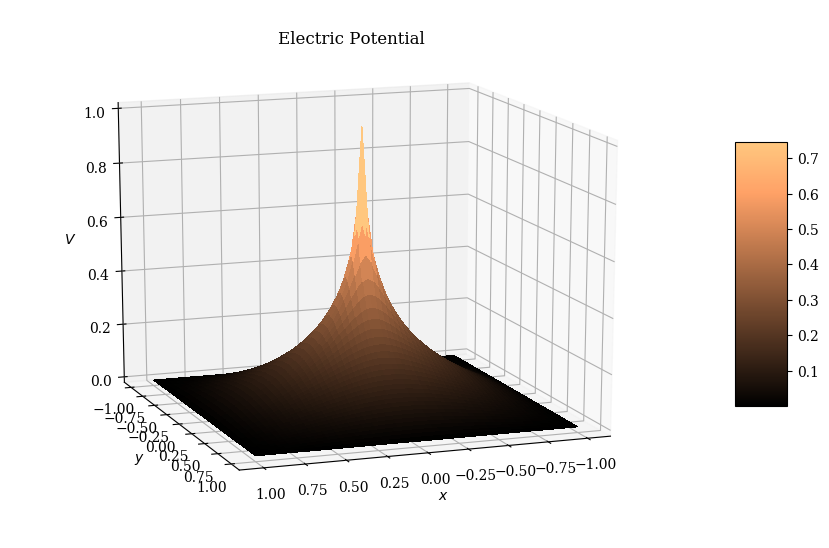

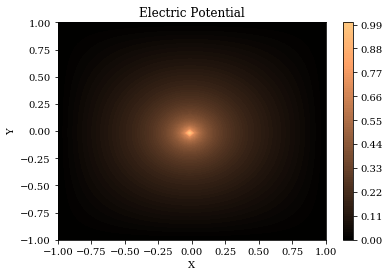

The iteration loop was run  1  times to reach a precision of  1e-10  with a grid divided into 3600  sections


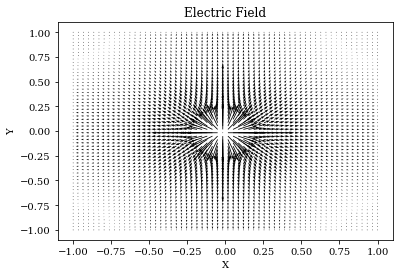

In [87]:
#extension 2: modelling  a point charge
#the problems of doing so is that there is no such thing as a true point charge in  a meshgrid, as each grid element is a square.
#so, instead of a true point charge, The boundary condition approximates an infinitesimally small square with width dx.


%matplotlib inline

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.copper,
            linewidth=0, antialiased=False)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(15,70) #sets the rotation of the image
    plt.show()
    
def printgraph(x, y, V):
    colorinterpolation = 100
    colourMap =  plt.cm.copper 
    X,Y = np.meshgrid(x,y)
    plt.title("Electric Potential")
    plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
def quiverplot(x,y,EFx, EFy):
        
    X,Y = np.meshgrid(x,y)
    plt.quiver(X,Y,EFx, EFy)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.show()


#the intended precision is given by precision_target
def iterationloop(V, precision_target):
    count = 0
    precision = 1
    Vn = np.empty_like(V)
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])  
        V[29:30, 29:30] = 1 #determines the length and thickness of each capacitor plate.
        precision = L2_norm_error(V, Vn)
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    return V, count


    
nx =60
ny = nx
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
precision_target = 0.0000000001
print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')
V = np.zeros((nx,ny))
tbefore = time.time()
V = iterationloop(V,precision_target)[0] 
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')
plot_3D(x, y, V, 'Electric Potential')
printgraph(x, y, V)


# below is the code to plot the electric field
dx = 0.1
V0 = np.zeros((nx,nx))
V_cap = iterationloop(V, precision_target)[0]
EFx = np.array(V0)
EFy = np.array(V0)
for i in range(1,len(V0)-1):# a loop to differentiate the potential.
    for j in range(1,len(V0)-1):
        EFx[1:-1,1:-1] = -(V_cap[1:-1,2:]- V_cap[1:-1,:-2])/(2*dx)
        EFy[1:-1,1:-1] = -(V_cap[2:,1:-1]- V_cap[:-2,1:-1])/(2*dx)

quiverplot(x,y,EFx, EFy)


The precision target (convergence condition) is  1e-10
the grid is divided into  1600  increments
The iteration loop was run  3422  times to reach a precision of  1e-10  with a grid divided into 1600  sections
The time taken to process the jacobi graph was  0.1583690643310547  seconds


/Users/ardjuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


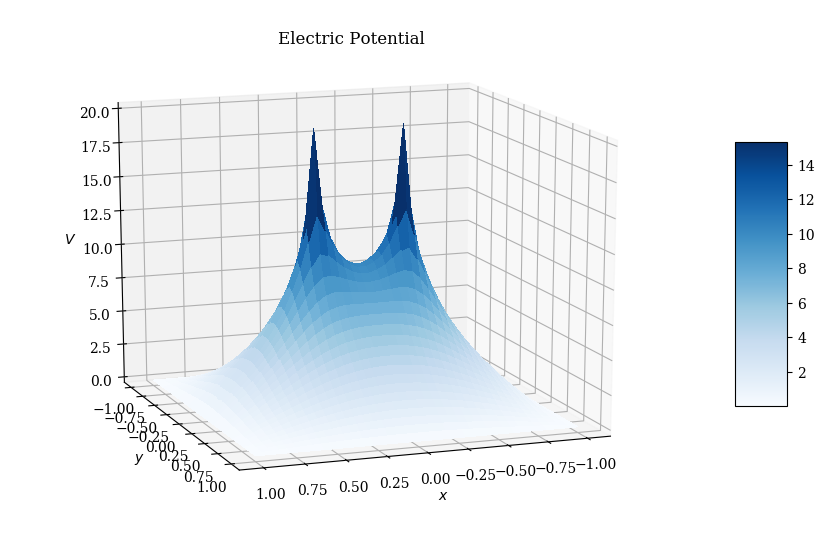

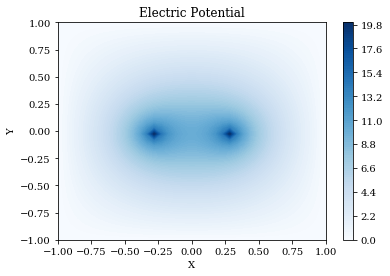

The iteration loop was run  1  times to reach a precision of  1e-10  with a grid divided into 1600  sections


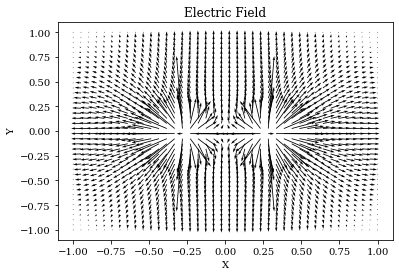

In [107]:
# extension 3: two point charges
#here it is demonstrated that even when the particles are further apart, the electric fields can still interact as long as the potential difference is high
# if the particles have the same charge sign, then the electric fields cancel out between them, as demonstrated.

%matplotlib inline

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.Blues,
            linewidth=0, antialiased=False)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(15,70) #sets the rotation of the image
    plt.show()
    
def printgraph(x, y, V):
    colorinterpolation = 100
    colourMap =  plt.cm.Blues 
    X,Y = np.meshgrid(x,y)
    plt.title("Electric Potential")
    plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
def quiverplot(x,y,EFx, EFy):
        
    X,Y = np.meshgrid(x,y)
    plt.quiver(X,Y,EFx, EFy, scale = 200)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.show()


#the intended precision is given by precision_target
def iterationloop(V, precision_target):
    count = 0
    precision = 1
    Vn = np.empty_like(V)
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])  

        V[19:20, 14:15] = 20
        V[19:20, 25:26] = 20
        
        precision = L2_norm_error(V, Vn)
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    return V, count


    
nx =40
ny = nx
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
precision_target = 0.0000000001
print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')
V = np.zeros((nx,ny))
tbefore = time.time()
V = iterationloop(V,precision_target)[0] 
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')
plot_3D(x, y, V, 'Electric Potential')
printgraph(x, y, V)


# below is the code to plot the electric field
dx = 0.1
V0 = np.zeros((nx,nx))
V_cap = iterationloop(V, precision_target)[0]
EFx = np.array(V0)
EFy = np.array(V0)
for i in range(1,len(V0)-1):# a loop to differentiate the potential.
    for j in range(1,len(V0)-1):
        EFx[1:-1,1:-1] = -(V_cap[1:-1,2:]- V_cap[1:-1,:-2])/(2*dx)
        EFy[1:-1,1:-1] = -(V_cap[2:,1:-1]- V_cap[:-2,1:-1])/(2*dx)

quiverplot(x,y,EFx, EFy)


The precision target (convergence condition) is  1e-10
the grid is divided into  1600  increments
The iteration loop was run  1158  times to reach a precision of  1e-10  with a grid divided into 1600  sections
The time taken to process the jacobi graph was  0.049784183502197266  seconds


/Users/ardjuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


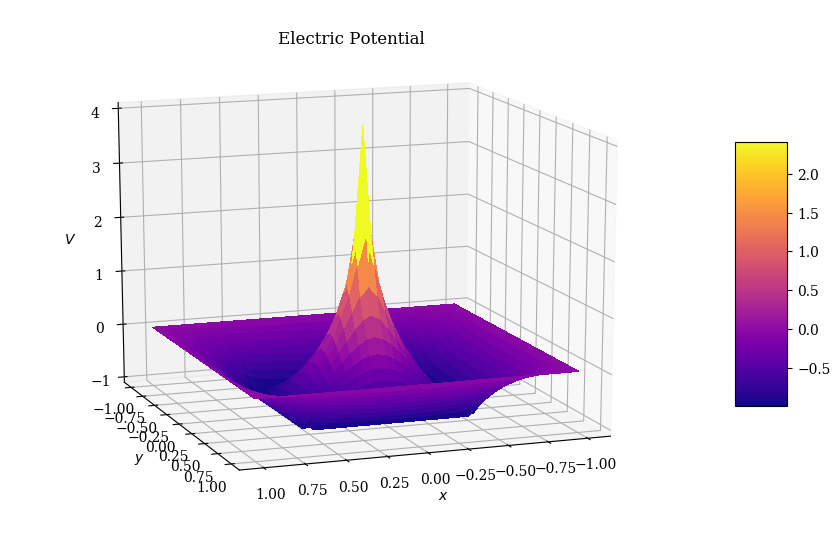

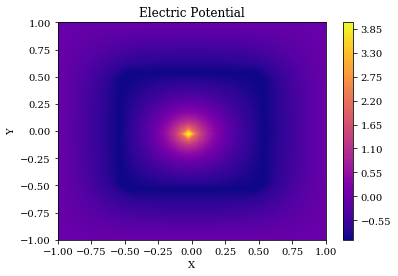

The iteration loop was run  1  times to reach a precision of  1e-10  with a grid divided into 1600  sections


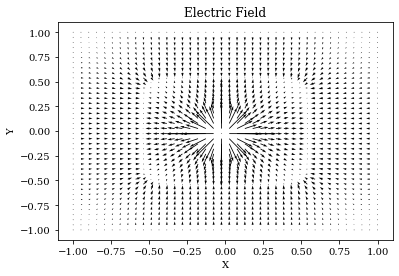

In [113]:
# extension 4: particle in a box


%matplotlib inline

def plot_3D(x, y, V, title):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,V[:], rstride=1, cstride=1, cmap=cm.plasma,
            linewidth=0, antialiased=False)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    ax.view_init(15,70) #sets the rotation of the image
    plt.show()
    
def printgraph(x, y, V):
    colorinterpolation = 100
    colourMap =  plt.cm.plasma 
    X,Y = np.meshgrid(x,y)
    plt.title("Electric Potential")
    plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
def quiverplot(x,y,EFx, EFy):
        
    X,Y = np.meshgrid(x,y)
    plt.quiver(X,Y,EFx, EFy, scale = 100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.show()


#the intended precision is given by precision_target
def iterationloop(V, precision_target):
    count = 0
    precision = 1
    Vn = np.empty_like(V)
    while precision > precision_target:
        count+=1       
        Vn = V.copy()
        V[1:-1,1:-1] = .25 * (Vn[1:-1,2:] + Vn[1:-1, :-2] \
                              +Vn[2:, 1:-1] + Vn[:-2, 1:-1])  
        V[10:30, 9:10] = -1 #determines the length and thickness of each capacitor plate.
        V[10:30, 30:31] = -1
        V[30:31, 10:30] = -1
        V[9:10, 10:30] = -1
        V[19:20, 19:20] = 4
        precision = L2_norm_error(V, Vn)
    print('The iteration loop was run ',count,' times to reach a precision of ', precision_target,' with a grid divided into', nx*nx,' sections')
    return V, count


    
nx =40
ny = nx
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
precision_target = 0.0000000001
print('The precision target (convergence condition) is ', precision_target)
print('the grid is divided into ', nx*ny, ' increments')
V = np.zeros((nx,ny))
tbefore = time.time()
V = iterationloop(V,precision_target)[0] 
tafter = time.time()

print('The time taken to process the jacobi graph was ',tafter-tbefore,  ' seconds')
plot_3D(x, y, V, 'Electric Potential')
printgraph(x, y, V)


# below is the code to plot the electric field
dx = 0.1
V0 = np.zeros((nx,nx))
V_cap = iterationloop(V, precision_target)[0]
EFx = np.array(V0)
EFy = np.array(V0)
for i in range(1,len(V0)-1):# a loop to differentiate the potential.
    for j in range(1,len(V0)-1):
        EFx[1:-1,1:-1] = -(V_cap[1:-1,2:]- V_cap[1:-1,:-2])/(2*dx)
        EFy[1:-1,1:-1] = -(V_cap[2:,1:-1]- V_cap[:-2,1:-1])/(2*dx)

quiverplot(x,y,EFx, EFy)
